---
layout: post
title:  "Optimizers"
date:   2023-05-15 10:14:54 +0700
categories: DeepLearning
---

# TOC

# Introduction

Optimization is part of the machine learning process in which it is used to find the minimization of loss function so that we find a good weights and biases for the function. It is to note that, during training, given the limited training set, the goal of optimization would be to minimize the loss of the training set. But eventually, we would like to minimize the loss of the generalization. So what we would really want is to minimize the loss function at the same time avoid overfitting on the training set.

Since the empirical loss on the training set can fluctuate, the min of it can be actually less than the true loss that we are truly after. We would, however, focus on the empirical loss and its numerical solution. Some of the challenges that we face in deep learning optimization are local minima, saddle points and vanishing gradients. For any objective function f, if on the graph of it, we have place where f(x) being smaller than any of its value in its neighborhood, we have a local minimum. If that minimum is over the entire domain, then it is the global minimum. In reality, the object function usually has many local optima. It can leads to the model settles on some local optimum guided by gradient being zero. In that case, some level of pertubation can help to move it out of the local optimum. Besides local minima, saddle points are also points in which the gradient goes to zero. A saddle point has all the characteristic of an optimum and usually it is an optimum with regards to some dimensions but not all. So it is neither a maximum nor a minimum. In that case, we can check the Hessian matrix of the function at the zero gradient points. If the eigenvalues of the matrix are all positive or negative we have an optimum but if there is a mixture of negative and positive values, we have a saddle point. In high dimensional datasets, it is quite likely that a point is a saddle rather than an optimum. Prior to ReLU, some activation function is also notorious for vanishing the gradient, for example, tanh. In tanh's activation, when x gets too big or too small, the gradient goes to zero naturally since the f(x) reaches its limit of -1 or 1.

# Gradient descent

Consider some continuously differentiable real valued function $$ f: R \to R $$. Using Tayler expansion:

$$ f(x + \epsilon) = f(x) + \epsilon f'(x) + O(\epsilon^2) $$

Pick $$ \epsilon = - \eta f'(x) $$:

$$ f(x - \eta f'(x)) = f(x) - \eta f'^2(x) + O(\eta^2 f'^2(x)) $$

With $$ \eta > 0 $$, if the gradient is not zero we have $$ \eta f'^2(x) > 0 $$, we have successfully reduced the objective function. Now we choose $$ \eta $$ small enough to make the O term becomes irrelevant:

$$ f(x - \eta f'(x)) \leq f(x) $$.

This means that if we update x to the direction of $$ x \leftarrow x - \eta f'(x) $$, the value of f(x) might decrease. Here is the algorithm:

- Choose an initial x
- Choose $$ \eta > 0 $$
- Iterate $$ x \leftarrow x - \eta f'(x) $$ until:
    - $$ \mid f'(x) \mid \to 0 $$
    - Or a number of iterations has been reached

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x ** 2
def f_grad(x):
    return 2 * x

def gd(eta, f_grad):
    x = 10.0
    results=[x]
    for i in range (10):
        x -= eta *f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x: f}')
    return results
results = gd(0.2, f_grad)


epoch 10, x:  0.060466


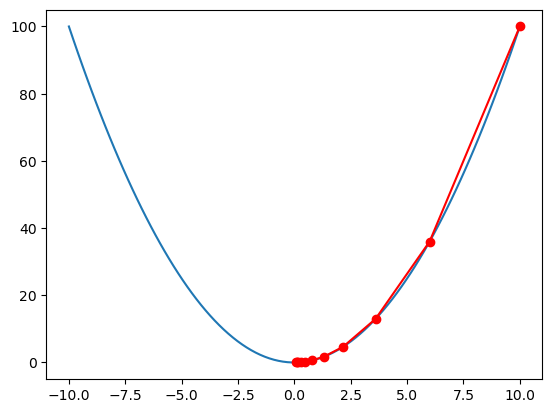

In [25]:
x = np.linspace(-10,10,100)
y = f(x)
x2 = np.array(results).reshape(-1,)
y2 = f(x2)
plt.plot(x,y)
plt.plot(x2,y2,color='red',marker="o")
plt.show()

$$ \eta $$ is called the learning rate. Tuning the learning rate is also an art. If the learning rate is too small, we might not reach the minimum in a reasonable amount of time. If the learning rate is too high, the function might hover over the minimum. In the worst case, the learning rate can make the function diverge.

For example, we can see the result if we use learning rate to be 0.05 and 1.1, respectively.

epoch 10, x:  3.486784


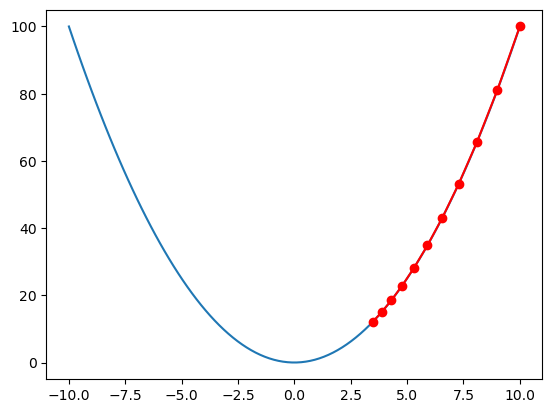

In [26]:
results = gd(0.05, f_grad)
x = np.linspace(-10,10,100)
y = f(x)
x2 = np.array(results).reshape(-1,)
y2 = f(x2)
plt.plot(x,y)
plt.plot(x2,y2,color='red',marker="o")
plt.show()

epoch 10, x:  1.073742


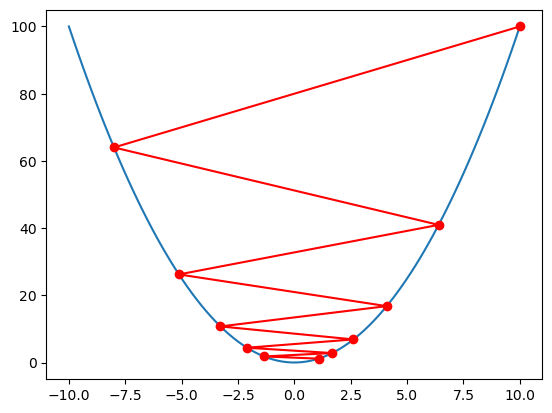

In [28]:
results = gd(0.9, f_grad)
x = np.linspace(-10,10,100)
y = f(x)
x2 = np.array(results).reshape(-1,)
y2 = f(x2)
plt.plot(x,y)
plt.plot(x2,y2,color='red',marker="o")
plt.show()

epoch 10, x: -1.528166


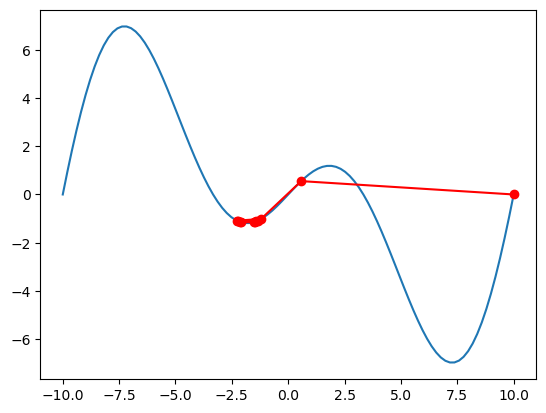

In [30]:
# Here is one example for local minimum

c = 0.15 * np.pi
def f(x):
    return x * np.cos(c * x)
def f_grad(x):
    return np.cos(c * x) - c * x * np.sin(c * x)
results = gd(2, f_grad)
x = np.linspace(-10,10,100)
y = f(x)
x2 = np.array(results).reshape(-1,)
y2 = f(x2)
plt.plot(x,y)
plt.plot(x2,y2,color='red',marker="o")
plt.show()

The situation is similar for multi variate gradient descent. 

In [32]:
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2):
    return (2 * x1, 4 * x2)
def gd(x1,x2, s1,s2, f_grad):
    g1,g2 = f_grad(x1,x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

def train(trainer, steps=20, f_grad=None):
    x1,x2,s1,s2=-5,-2,0,0
    results = [(x1,x2)]
    for i in range (steps):
        if f_grad:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2,f_grad)
        else:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        results.append((x1,x2))
    print(f'epoch {i+1}, x1: {float(x1):f}, x2:{float(x1):f}')
    return results
eta = 0.1
results = train(gd, f_grad=f_grad)

epoch 20, x1: -0.057646, x2:-0.057646


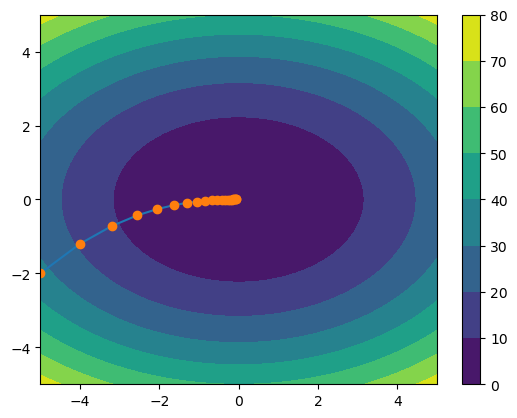

In [53]:
xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

# Stochastic gradient descent

To generalize better, we can aim to minimize the average loss function for each example in the training dataset. 

$$ f(x) = \frac{1}{n} \sum_{i=1}^{n} f_i (x) $$

Here is the gradient:

$$ \nabla f(x) = \frac{1}{n} \sum_{i=1}^{n} \nabla f_i (x) $$

If we increase the size of the training set N, the computation cost for each step increases. Stochastic gradient descent is to remedy this. At each step, we sample an input and compute the gradient $$ \nabla f_i (x) $$ to update $$ x \leftarrow x - \eta \nabla f_i (x) $$. Even better, the stochastic gradient $$ \nabla f_i (x) $$ is an unbiased estimate of the full gradient $$ \nabla f(x) $$ because:

$$ E_i \nabla f_i (x) = \frac{1}{n} \sum_{i=1}^{n} \nabla f_i(x) = \nabla f(x) $$


epoch 20, x1: 0.093033, x2:0.093033


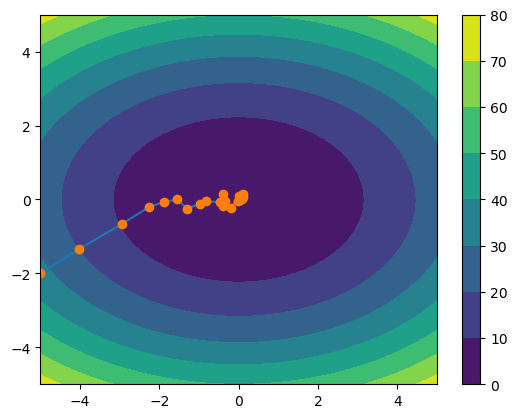

In [63]:
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2):
    return (2 * x1, 4 * x2)

def constant_lr():
    return 1

eta = 0.1
lr = constant_lr

def sgd(x1,x2, s1,s2, f_grad):
    g1,g2 = f_grad(x1,x2)
    g1 += np.random.normal(0,1,1)[0]
    g2 += np.random.normal(0,1,1)[0]
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def train(trainer, steps=20, f_grad=None):
    x1,x2,s1,s2=-5,-2,0,0
    results = [(x1,x2)]
    for i in range (steps):
        if f_grad:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2,f_grad)
        else:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        results.append((x1,x2))
    print(f'epoch {i+1}, x1: {float(x1):f}, x2:{float(x1):f}')
    return results

results = train(sgd, f_grad=f_grad)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

As we see that the process is stochastic by nature. Hence the constant learning rate causes an issue of not being able to converge. A better solution is to dynamically choose the learning rate. There are different strategies to do this:

- $$ \eta(t) = \eta_i $$ if $$ t_i \leq t \leq t_{i+1} $$ (piecewise constant)

- $$ \eta(t) = \eta_0 . e^{-\lambda t} $$ (exponential decay)

- $$ \eta(t) = \eta_0 . (\beta t + 1)^{-\alpha} $$ (polynomial decay)

Exponential decay can lead to premature stopping because it decreases the learning rate aggressively.


epoch 20, x1: -1.039611, x2:-1.039611


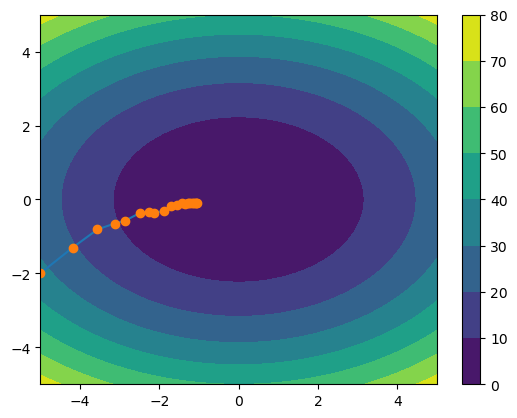

In [69]:
import math

def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2):
    return (2 * x1, 4 * x2)

def exponential_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return math.exp(-0.1 * t)

t=1
lr = exponential_lr

def sgd(x1,x2, s1,s2, f_grad):
    g1,g2 = f_grad(x1,x2)
    g1 += np.random.normal(0,1,1)[0]
    g2 += np.random.normal(0,1,1)[0]
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def train(trainer, steps=20, f_grad=None):
    x1,x2,s1,s2=-5,-2,0,0
    results = [(x1,x2)]
    for i in range (steps):
        if f_grad:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2,f_grad)
        else:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        results.append((x1,x2))
    print(f'epoch {i+1}, x1: {float(x1):f}, x2:{float(x1):f}')
    return results

results = train(sgd, f_grad=f_grad)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

epoch 20, x1: -0.195408, x2:-0.195408


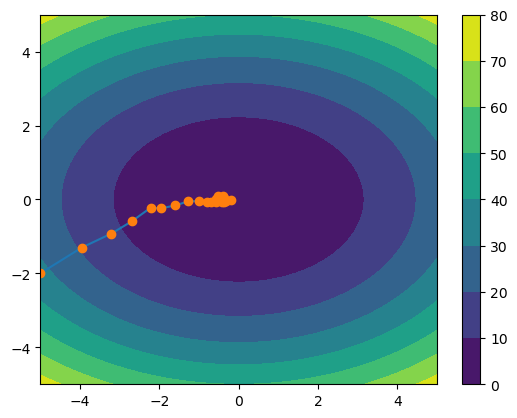

In [70]:
import math

def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2
def f_grad(x1, x2):
    return (2 * x1, 4 * x2)

def polynomial_lr():
    # Global variable that is defined outside this function and updated inside
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr

def sgd(x1,x2, s1,s2, f_grad):
    g1,g2 = f_grad(x1,x2)
    g1 += np.random.normal(0,1,1)[0]
    g2 += np.random.normal(0,1,1)[0]
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def train(trainer, steps=20, f_grad=None):
    x1,x2,s1,s2=-5,-2,0,0
    results = [(x1,x2)]
    for i in range (steps):
        if f_grad:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2,f_grad)
        else:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        results.append((x1,x2))
    print(f'epoch {i+1}, x1: {float(x1):f}, x2:{float(x1):f}')
    return results

results = train(sgd, f_grad=f_grad)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

# Mini batch stochastic gradient descent

If gradient descent uses the full training dataset for calculation of loss function, and the stochastic gradient descent uses one input data point for calculation of loss function, the minibatch is in between. It uses a batch of the full dataset for calculation. This is to mediate between the two extremes and keep computation efficiency at heart.

For a single data point, we update $$ w \leftarrow w - \eta_t g_t $$ where $$ g_t = \delta_w f(x_t, w) $$. This requires performing many single matrix - vector multiplications. We can increase the computational efficiency by applying to a minibatch of data at a time. We replace $$ g_t $$ (gradient over a single observation) by one over a small batch:

$$ g_t = \delta_w \frac{1}{\mid B_t \mid} \sum_{i \in B_t} f(x_i, w) $$

The expectation of the gradient $$ g_t $$ doesn't change since the observations are drawn uniformly at random from the same set, the variance, though, is reduced significantly, by a factor of $$ b^{-1/2} $$.

# Momentum

## Leaky averages

The leaky average averages over the past gradients:

$$ v_t = \beta v_{t-1} + g_{t,t-1} $$, with $$ \beta \in (0,1) $$.

We call v the velocity. 

$$ v_t = \beta^2 v_{t-2} + \beta g_{t-1,t-2} + g_{t,t-1} = ... = \sum_{r=0}^{t-1} \beta^r g_{t-r, t-r-1} $$

This makes the new gradient no longer points into the steepest descent but in the direction of a weighted average of past gradients. This has the benefits of averaging over a batch without the computation cost. This way of thinking forms the basis for accelerated gradient methods, such as momentum. It stabilises the gradients over a narrow canyon for example. It can also help in situation of high dimesional: the gradient diverges in one dimension but slow to converge in another one, so choosing learning rate is tricky. We have the following update equations:

$$ v_t \leftarrow \beta v_{t-1} + g_{t,t-1} $$

$$ x_t \leftarrow x_{t-1} - \eta_t v_t $$

at $$ \beta = 0 $$ we have the regular gradient descent.

# AdaGrad

AdaGrad also accumulate past gradient variance:

$$ g_t = \delta_w l(y_t, f(x_t, w)) $$

$$ s_t = s_{t-1} + g_t^2 $$

$$ w_t = w_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}} g_t $$

We initialize $$ s_0 = 0 $$


epoch 20, x1: -2.382563, x2:-2.382563


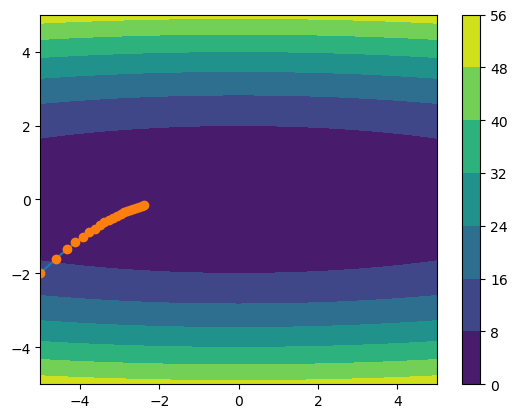

In [80]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4

import math

def train(trainer, steps=20, f_grad=None):
    x1,x2,s1,s2=-5,-2,0,0
    results = [(x1,x2)]
    for i in range (steps):
        if f_grad:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2,f_grad)
        else:
            x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        results.append((x1,x2))
    print(f'epoch {i+1}, x1: {float(x1):f}, x2:{float(x1):f}')
    return results

results = train(adagrad_2d)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f_2d(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

epoch 20, x1: -0.002295, x2:-0.002295


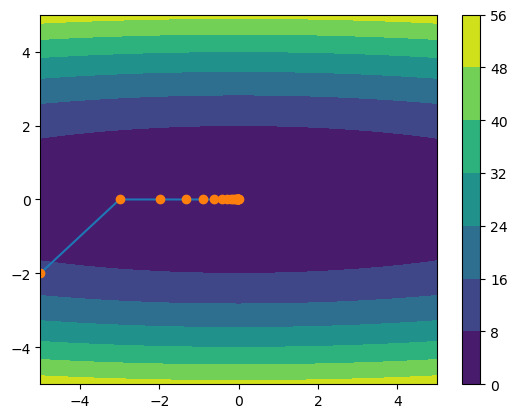

In [81]:
eta = 2
results = train(adagrad_2d)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f_2d(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

# RMSProp

The algorithm:

$$ s_t \leftarrow \gamma s_{t-1} + (1- \gamma) g_t^2 $$

$$ x_t \leftarrow x_{t-1} - \frac{\eta}{\sqrt{s_t + \epsilon}} g_t $$

The constant $$ \epsilon > 0 $$ is usually set to $$ 10^{-6} $$ to avoid division by zero or too large step sizes.


epoch 20, x1: -0.010599, x2:-0.010599


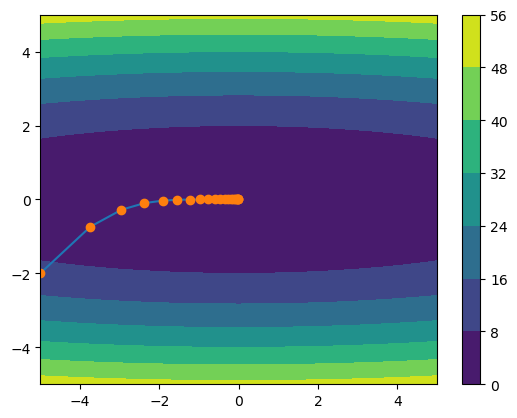

In [83]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
results = train(rmsprop_2d)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z=f_2d(X,Y)

X2 = [result[0] for result in results]
Y2 = [result[1] for result in results]
# Z2=[f(X2[i],Y2[i]) for i in range(20)]

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
plt.plot(X2,Y2)
plt.plot(X2,Y2, 'o')
fig.colorbar(cp)

# Adam
Adam is between RMSprop and Momentum. It is like a heavy ball with friction, this helps to overcome the local minimum and reach the global minimum easier.